In [1]:
#pip install plotly


In [2]:
#Import data_loader script
from data_loader import DataLoader
#EDA libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

plt.style.use('ggplot')
sns.set_theme()


In [3]:
loader = DataLoader("Data/telco_churn_with_all_feedback.csv", "Data/telco_churn_with_all_feedback.csv")
loader.load_data()
info=loader.get_basic_info()
print(info)
train_processed, test_processed = loader.get_processed_data()


Učitavanje train podataka...
Train podaci učitani: (7043, 23)
Učitavanje test podataka...
Test podaci učitani: (7043, 23)
{'train_shape': (7043, 23), 'test_shape': (7043, 23), 'train_columns': ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'PromptInput', 'CustomerFeedback'], 'test_columns': ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'PromptInput', 'CustomerFeedback']}


In [4]:
test_processed.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PromptInput,CustomerFeedback
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Write a realistic customer feedback based on t...,I have been using the DSL internet service fro...
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,Write a realistic customer feedback based on t...,I have been a customer with this company for o...
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Write a realistic customer feedback based on t...,I recently signed up for DSL internet service ...


## FEATURE ENGINEERING
<a id='featureeng'></a>

In [5]:
train_processed.info()
#customerID izbaciti - ne treba nam za predviđanje
#gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod - PREBACITI u kategoriju,ONE HOT encoding



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
train_processed['Churn'].info()


<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: Churn
Non-Null Count  Dtype 
--------------  ----- 
7043 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [7]:
#Provera NULL vrednosti
train_processed.isnull().sum()
test_processed.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
PromptInput         0
CustomerFeedback    0
dtype: int64

In [8]:
#(train_processed == "").sum() --- SVE OK


# train_processed.apply(
#     lambda col: col.str.isspace().sum() if col.dtype == "object" else 0

#) #totalCharges ima 11 " "

fake_na = ["NA", "N/A", "na", "null", "NULL", "?", "nan", "NaN"]
for val in fake_na:
    print(val, (train_processed == val).sum().sum()) #SVE OK



NA 0
N/A 0
na 0
null 0
NULL 0
? 0
nan 0
NaN 0


In [9]:
(train_processed == "").sum() 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
PromptInput         0
CustomerFeedback    0
dtype: int64

In [10]:
train_processed.apply(
     lambda col: col.str.isspace().sum() if col.dtype == "object" else 0
)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
PromptInput          0
CustomerFeedback     0
dtype: int64

In [11]:
#provera jedinstvenih vrednosti
train_processed.nunique() #customerID brišemo


customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6539
Churn                  2
PromptInput         6835
CustomerFeedback    7043
dtype: int64

In [12]:
#Procenat korisnika koji su dali feedback, svaki korisnik je dao feedback
feedback_info = train_processed['CustomerFeedback'].notna()
train_processed['HasFeedback'] = feedback_info
feedback_info.mean()

np.float64(1.0)

In [13]:
train_processed['feedback_length'] = train_processed['CustomerFeedback'].str.len()
train_processed['feedback_length'].describe()
#Dužina korisničkih komentara je ujednačena, sa prosekom oko 460 karaktera i bez ekstremno kratkih ili praznih vrednosti

count    7043.000000
mean      460.571205
std        68.197917
min       277.000000
25%       414.000000
50%       454.000000
75%       499.000000
max       840.000000
Name: feedback_length, dtype: float64

In [14]:
train_processed['Churn'].value_counts(normalize=True)
#izuzetno nebalansiran skup podataka

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

In [15]:
#Analiza feedback-a korisnika koji su otišli i koji su se zadržali
pd.set_option('display.max_colwidth', None)
churned = train_processed[(train_processed['Churn'] == 'Yes')]
churned[['customerID', 'CustomerFeedback']].sample(3, random_state=1)

,customerID,CustomerFeedback
4572,6481-OGDOO,"""I've been a loyal customer for over 5 years now, but unfortunately I've decided to churn. The $90.6 monthly charges for fiber optic internet were starting to become too costly for me. I appreciated the convenience of automatic credit card payments, but ultimately I had to make a change due to budget constraints. Overall, the service was reliable and the speeds were great, but I needed to find a more affordable option."""
5971,8749-JMNKX,"I have been a customer with this company for over four years and have been relatively satisfied with the service provided. However, I recently decided to switch to a different provider due to better pricing options. The monthly charges were a bit high for me at $93.8, especially considering I was on a month-to-month contract. The fiber optic internet service was reliable and fast, but I felt that I could find a better deal elsewhere. The automatic bank transfer payment method was convenient and hassle-free. Overall, I had a positive experience with the company but ultimately chose to leave due to pricing considerations."
5927,4585-HETAI,"I recently switched to this internet provider four months ago and unfortunately, I have already decided to churn. While the fiber optic internet service was fast and reliable, I found the monthly charges to be on the higher side at $73.75. Additionally, the payment method of electronic check was not very convenient for me. Overall, I was satisfied with the service quality but ultimately decided to switch to a different provider for better pricing and payment options."


In [16]:
churned = train_processed[(train_processed['Churn'] == 'No')]
churned[['customerID', 'CustomerFeedback']].sample(3, random_state=1)

,customerID,CustomerFeedback
6673,4439-YRNVD,"I have been a customer with this DSL provider for 10 months now on a month-to-month contract with a monthly charge of $36.25. I have found the service to be reliable and the internet speed to be sufficient for my needs. I appreciate the convenience of paying with electronic check. Overall, I am satisfied with the service and have had no issues that would make me consider switching providers."
1785,0506-YLVKJ,"I have been a customer with this company for 46 months now and I have been very satisfied with their service. I appreciate the affordable monthly charges of $20.2 and the convenience of being able to pay through mailed check. Even though I do not use their internet service, I have had no issues with the other services provided. Overall, I have had a positive experience and would recommend this company to others."
1539,4632-PAOYU,"I have been a customer with this company for almost two years now and I have been satisfied with the service. Even though I do not have internet service with them, I appreciate the affordable monthly charges of $19.95. I prefer to pay by mailed check and have had no issues with the payment process. Overall, I have had a positive experience with this company and have no plans to churn in the near future."


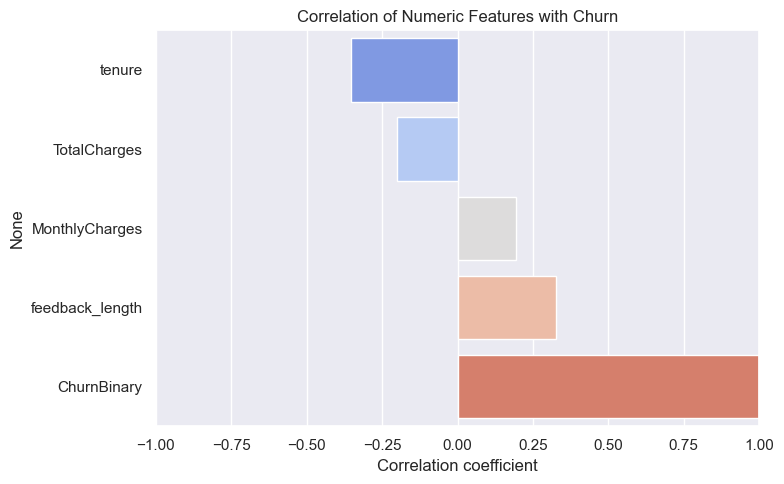

In [17]:
#Transformacija izlazne promenljive Churn
# Churn---Binary
train_processed['ChurnBinary'] = train_processed['Churn'].map({'No': 0, 'Yes': 1})

# Numerički atributi u jednu listu
train_processed['TotalCharges'] = pd.to_numeric(train_processed['TotalCharges'], errors='coerce')
numeric_cols = train_processed.select_dtypes(include=['int64', 'float64']).columns
numeric_cols = numeric_cols.drop('SeniorCitizen')
correlations = train_processed[numeric_cols].corrwith(train_processed['ChurnBinary']).sort_values()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title("Correlation of Numeric Features with Churn")
plt.xlabel("Correlation coefficient")
plt.xlim(-1, 1)
plt.tight_layout()
plt.show()

tenure — negativna korelacija (~ -0.25)
    Što je korisnik duže kod provajdera, manja je verovatnoća da će otići.
    Ovo je najjača (i očekivana) negativna korelacija.
SeniorCitizen — slabo pozitivna (~ 0.1)
    Stariji korisnici imaju nešto veću sklonost ka odlasku, ali je efekat mali.
MonthlyCharges — vrlo slaba korelacija (~ 0.07)
    Sama mesečna cena skoro da ne utiče na churn.
feedback_length — slabo pozitivna (~ 0.2)
    Duži komentari mogu značiti nezadovoljstvo ili detaljno objašnjavanje problema, pa blago povećavaju šansu za churn.

Graf pokazuje da churn najviše opada sa dužinom korišćenja usluge (tenure), dok stariji korisnici, dužina feedbacka i mesečna cena imaju samo slab pozitivan uticaj na verovatnoću odlaska.

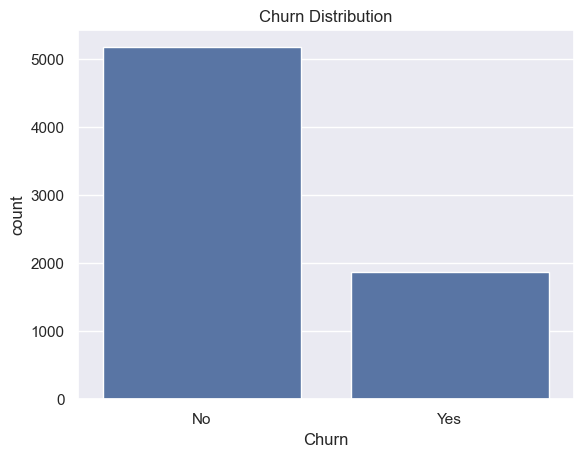

In [18]:
#Crtanje countplot-a koji prikazuje koliko ima korisnika sa Churn = "Yes" i "No", odnosno vizualizuje raspodelu odlazaka i ostanaka u datasetu.
sns.countplot(data=train_processed, x='Churn')
plt.title('Churn Distribution')
plt.show()

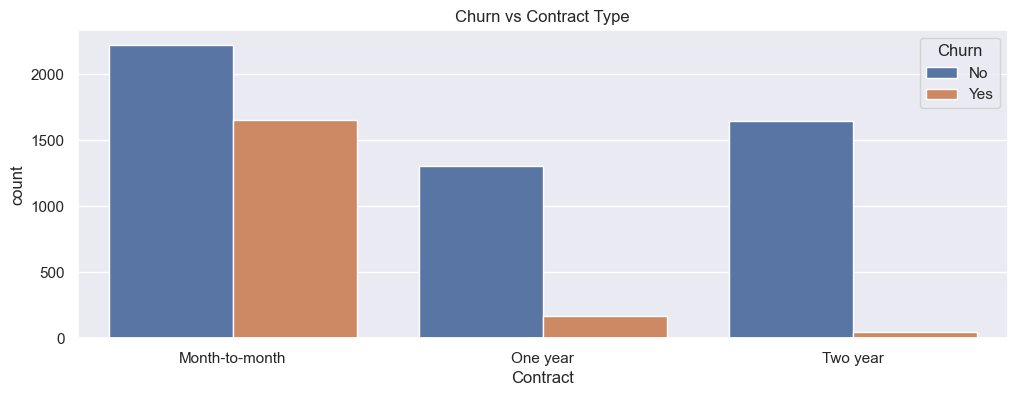

In [19]:
#provera korelacije kategorijskih atributa sa izlaznom promenljivom
# churn vs contract / internet
plt.figure(figsize=(12, 4))
sns.countplot(x='Contract', hue='Churn', data=train_processed)
plt.title('Churn vs Contract Type')
plt.show()

Korisnici sa mesečnim ugovorom će pre otići nego korisnici sa godišnjim/dvogodišnjim ugovorom.
BITAN ATRIBUT

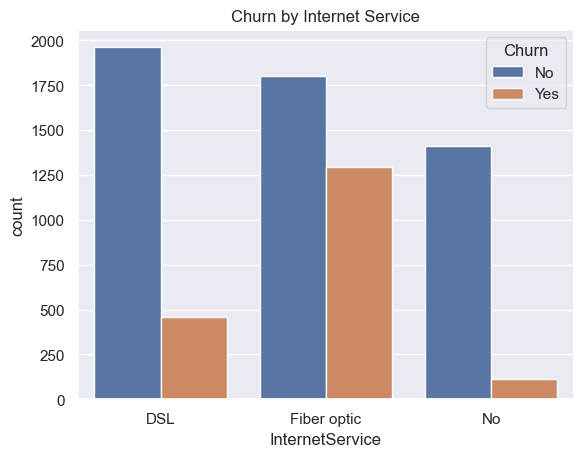

In [20]:
# Internet Service
sns.countplot(data=train_processed, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service')
plt.show()

Korisnici sa optičkim internetom imaju najviše stope churn-a, uprkos tome što koriste modernu uslugu.
Korisnici bez internet usluge retko odustaju — verovatno zbog nižih očekivanja ili jednostavnijih paketa.
Stopa churn-a kod DSL korisnika je umerena, što ukazuje na mešovito zadovoljstvo ili percepciju vrednosti usluge.

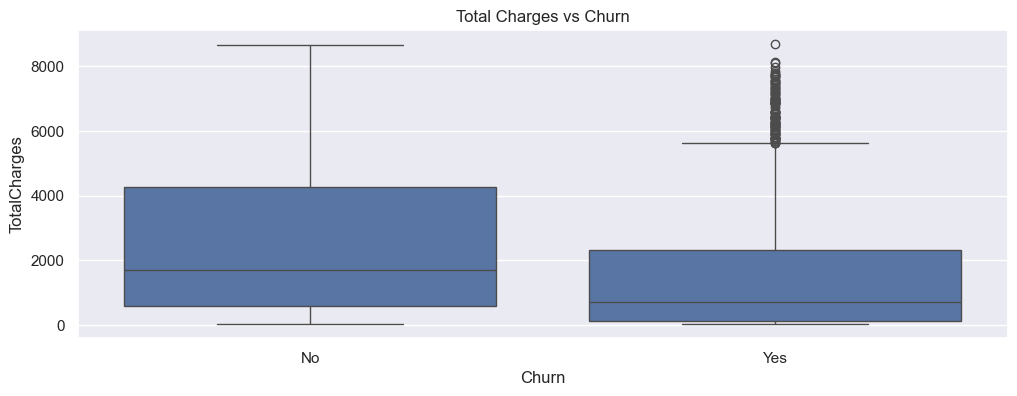

In [21]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Churn', y='TotalCharges', data=train_processed)
plt.title('Total Charges vs Churn')
plt.show()

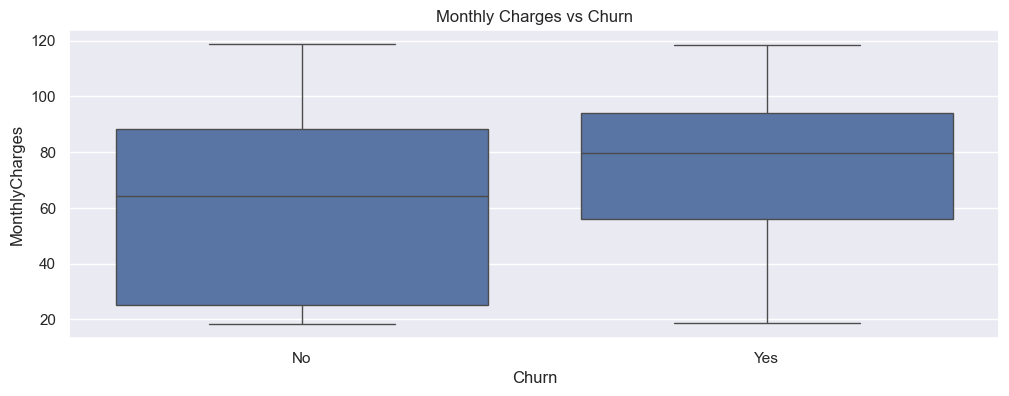

In [22]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=train_processed)
plt.title('Monthly Charges vs Churn')
plt.show()

Korisnici koji odustanu uglavnom imaju nešto više prosečne mesečne troškove.
Cena može biti ključni faktor nezadovoljstva.
Ovo podržava pretpostavku da visoki mesečni troškovi mogu biti pokretač churn-a, posebno kod cenovno osetljivih korisnika.


In [23]:
# Korelacija izmedju dve numericke kolone (total i monthly charges)
corelation=train_processed['TotalCharges'].corr(train_processed['MonthlyCharges']).item()
print(corelation)

#korelisane,promene u jednoj su dosta povezane sa promenama u drugoj. izbaciti totalcharges


0.6510648032262026


## Feedback exploration
<a id='Feedbackexploration'></a>

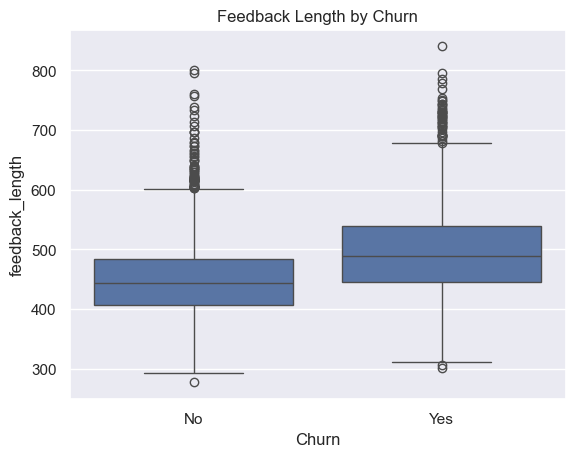

In [24]:
# Distribucija dužine feedback-a po Churn-u
sns.boxplot(data=train_processed, x='Churn', y='feedback_length')
plt.title('Feedback Length by Churn')
plt.show()

Korisnici koji su odustali ostavljaju duže tekstualne komentare u proseku od onih koji ostaju, što može ukazivati na jače emocije ili detaljnije pritužbe; dužina komentara može poslužiti kao indikator angažovanosti ili nezadovoljstva u modelu.

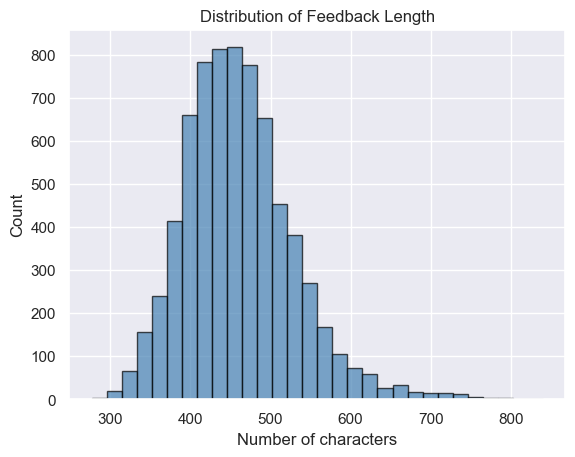

In [25]:
#feedback lenght
plt.hist(train_processed['feedback_length'],bins=30, alpha=0.7, label='Churn = No', color='steelblue', edgecolor='black')
plt.title("Distribution of Feedback Length")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.show()

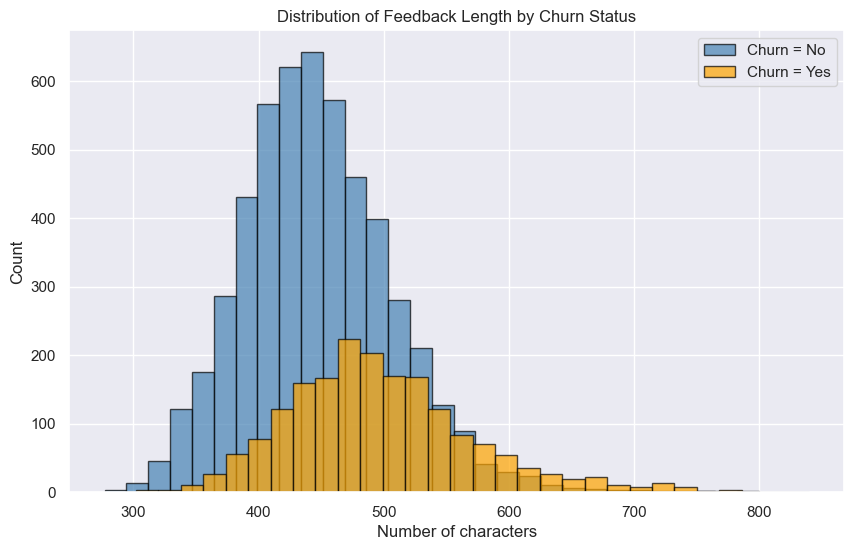

In [26]:
# Data separation
feedback_yes = train_processed[train_processed['Churn'] == 'Yes']['feedback_length']
feedback_no = train_processed[train_processed['Churn'] == 'No']['feedback_length']

# Histogram with two groups
plt.figure(figsize=(10, 6))
plt.hist(feedback_no, bins=30, alpha=0.7, label='Churn = No', color='steelblue', edgecolor='black')
plt.hist(feedback_yes, bins=30, alpha=0.7, label='Churn = Yes', color='orange', edgecolor='black')

plt.title("Distribution of Feedback Length by Churn Status")
plt.xlabel("Number of characters")
plt.ylabel("Count")
plt.legend()
plt.show()


Histogram pokazuje da korisnici koji su otišli (narandžasto) u proseku ostavljaju duže komentare od onih koji su ostali (plavo). Oba segmenta imaju sličan vrh (oko 400–450 karaktera), ali churn korisnici imaju nešto duži desni rep, što ukazuje na detaljnije ili emotivnije poruke — korisno za modelovanje i segmentaciju.

In [27]:
print(numeric_cols)


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'feedback_length',
       'ChurnBinary'],
      dtype='object')


## Sentiment analiza - prosta
<a id='Simplesentimentanalysis'></a>

In [28]:
#pip install textblob


In [29]:
from textblob import TextBlob

# -1(negative) +1 (positive)
train_processed['sentiment'] = train_processed['CustomerFeedback'].apply(lambda x: TextBlob(x).sentiment.polarity)
train_processed[['CustomerFeedback', 'sentiment']].head()


,CustomerFeedback,sentiment
0,"I have been using the DSL internet service from this provider for the past month and so far, I am satisfied with the service. The connection has been reliable and the speed is sufficient for my needs. The monthly charges are reasonable at $29.85 and I appreciate the convenience of paying through electronic check. Overall, I have had a positive experience and would recommend this provider to others.",0.129545
1,"I have been a customer with this company for over two and a half years now and I have been very satisfied with their service. The DSL internet has been reliable and the monthly charges are reasonable at $56.95. I prefer to pay by mailing in a check and have never had any issues with my payments. Overall, I have no complaints and would recommend this company to others looking for internet service.",0.170833
2,"I recently signed up for DSL internet service with this provider two months ago on a month-to-month contract. Unfortunately, I have already decided to churn and switch to a different provider. The monthly charges of $53.85 were reasonable, but I found the internet service to be unreliable and slow. Additionally, having to mail in a check for payment was inconvenient and outdated. I would not recommend this provider to others looking for reliable and convenient internet service.",-0.228571
3,"I have been a loyal customer with this company for 45 months now and I am very satisfied with the service they provide. The monthly charges are reasonable at $42.3 and I appreciate the convenience of automatic bank transfer for payment. The DSL internet service has been reliable and meets my needs. Overall, I have had a positive experience with this company and have no plans to churn in the near future.",0.215801
4,"I recently switched to this fiber optic internet service provider two months ago on a month-to-month contract. The monthly charges of $70.7 seemed reasonable at first, but unfortunately I have experienced frequent outages and slow speeds. The payment method of electronic check has been convenient, but I am disappointed with the overall service. I have decided to churn and look for a more reliable internet provider.",0.030000


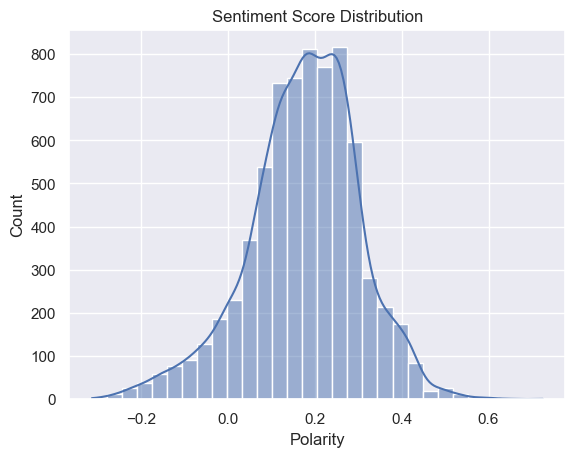

In [30]:
sns.histplot(train_processed['sentiment'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.xlabel("Polarity")
plt.show()

Većina korisničkih komentara je blago pozitivna, bez ekstremno negativnog sentimenta.
Distribucija sentiment skorova je uglavnom oko neutralne do blago negativne polaritete, što sugeriše da su komentari više činjenični ili usmereni na pritužbe. Malo korisnika izražava snažno pozitivan ton — verovatno zato što se povratne informacije češće daju kada postoji neki problem. Ovo podržava ideju da analiza sentimenta može biti prediktivna za churn i korisna za segmentaciju korisnika prema emocionalnom tonu.

Ključni nalazi:
Skup podataka sadrži 7.043 zapisa o korisnicima, sa strukturiranim atributima i generisanim tekstualnim komentarima.
Stopa odlaska korisnika je oko 26%, uz prisutnu neravnotežu klasa, što je uobičajeno u realnim scenarijima.
Korisnici sa mesečnim ugovorima imaju znatno veću stopu churn-a, dok ugovori na 1–2 godine poboljšavaju zadržavanje.
Veće mesečne naknade i fiber optic internet su pozitivno povezani sa churn-om.
Korisnici koji su napustili uslugu pišu duže i izražajnije komentare, često naglašavajući nezadovoljstvo.
Analiza sentimenta pokazuje naginjanje ka neutralnom do negativnom tonu, posebno kod churnovanih korisnika.
Dužina komentara i sentiment imaju statistički značajne korelacije sa churn statusom.

In [31]:
train_processed = train_processed.drop('customerID', axis=1)
train_processed = train_processed.drop('HasFeedback', axis=1)
train_processed = train_processed.drop('TotalCharges', axis=1)
train_processed = train_processed.drop('Churn', axis=1)

#Ne nose nikakvu informaciju
train_processed = train_processed.drop('gender', axis=1)
train_processed = train_processed.drop('PromptInput', axis=1)

In [32]:
for col in train_processed.columns:
    print(col, train_processed[col].dtype)



SeniorCitizen int64
Partner object
Dependents object
tenure int64
PhoneService object
MultipleLines object
InternetService object
OnlineSecurity object
OnlineBackup object
DeviceProtection object
TechSupport object
StreamingTV object
StreamingMovies object
Contract object
PaperlessBilling object
PaymentMethod object
MonthlyCharges float64
CustomerFeedback object
feedback_length int64
ChurnBinary int64
sentiment float64


In [33]:
categorical_cols = [
    "Partner","Dependents","PhoneService","MultipleLines",
    "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
    "TechSupport","StreamingTV","StreamingMovies","Contract",
    "PaperlessBilling","PaymentMethod"
]

train_encoded = pd.get_dummies(train_processed, 
                               columns=categorical_cols, 
                               drop_first=True)


In [34]:
train_encoded.head(1)

,SeniorCitizen,tenure,MonthlyCharges,CustomerFeedback,feedback_length,ChurnBinary,sentiment,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,"I have been using the DSL internet service from this provider for the past month and so far, I am satisfied with the service. The connection has been reliable and the speed is sufficient for my needs. The monthly charges are reasonable at $29.85 and I appreciate the convenience of paying through electronic check. Overall, I have had a positive experience and would recommend this provider to others.",401,0,0.129545,True,False,False,...,False,False,False,False,False,False,True,False,True,False


## Skaliranje numerickih atributa
<a id='Simplesentimentanalysis'></a>

In [35]:
numeric_cols_clean = [col for col in numeric_cols if col not in ['ChurnBinary', 'TotalCharges']]
print(numeric_cols_clean)


['tenure', 'MonthlyCharges', 'feedback_length']


In [36]:
train_encoded[numeric_cols_clean].describe()


,tenure,MonthlyCharges,feedback_length
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,460.571205
std,24.559481,30.090047,68.197917
min,0.000000,18.250000,277.000000
25%,9.000000,35.500000,414.000000
50%,29.000000,70.350000,454.000000
75%,55.000000,89.850000,499.000000
max,72.000000,118.750000,840.000000


Svaka kolona ima različit opseg

In [37]:
from sklearn.preprocessing import StandardScaler

# Kreiramo scaler
scaler = StandardScaler()

# Kopiramo DataFrame da ne menjamo original
train_scaled = train_encoded.copy()

# Skaliramo numeričke kolone
train_scaled[numeric_cols_clean] = scaler.fit_transform(train_scaled[numeric_cols_clean])

# Provera: min, max i srednja vrednost
train_scaled[numeric_cols_clean].describe()


,tenure,MonthlyCharges,feedback_length
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.053182e-17,2.784464e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-2.691933e+00
25%,-9.516817e-01,-9.725399e-01,-6.829316e-01
50%,-1.372744e-01,1.857327e-01,-9.636177e-02
75%,9.214551e-01,8.338335e-01,5.635293e-01
max,1.613701e+00,1.794352e+00,5.564037e+00


In [38]:
train_scaled.head(1)

,SeniorCitizen,tenure,MonthlyCharges,CustomerFeedback,feedback_length,ChurnBinary,sentiment,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,"I have been using the DSL internet service from this provider for the past month and so far, I am satisfied with the service. The connection has been reliable and the speed is sufficient for my needs. The monthly charges are reasonable at $29.85 and I appreciate the convenience of paying through electronic check. Overall, I have had a positive experience and would recommend this provider to others.",-0.873567,0,0.129545,True,False,False,...,False,False,False,False,False,False,True,False,True,False


## Split dataset BEZ FEEDBACK-A
<a id='Simplesentimentanalysis'></a>

In [40]:
from sklearn.model_selection import train_test_split


input_without_feedback = train_scaled.drop(["ChurnBinary", "CustomerFeedback"], axis=1)
output_without_feedback = train_scaled["ChurnBinary"]

input_train, input_test, output_train, output_test = train_test_split(
    input_without_feedback, output_without_feedback, test_size=0.2, random_state=42,stratify=output_without_feedback
)

In [ ]:
print(output_train.value_counts(normalize=True))
print(output_test.value_counts(normalize=True))


ChurnBinary
0    0.734647
1    0.265353
Name: proportion, dtype: float64
ChurnBinary
0    0.734564
1    0.265436
Name: proportion, dtype: float64



--- Logistic Regression ---
Train Accuracy: 0.894
Test Accuracy: 0.900
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1035
           1       0.84      0.77      0.80       374

    accuracy                           0.90      1409
   macro avg       0.88      0.86      0.87      1409
weighted avg       0.90      0.90      0.90      1409



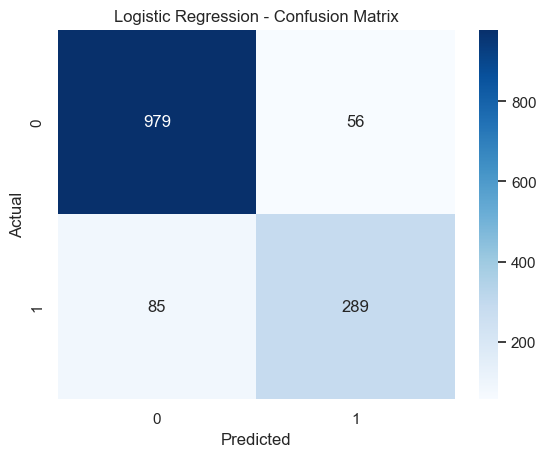


--- Random Forest ---
Train Accuracy: 1.000
Test Accuracy: 0.901
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      1035
           1       0.86      0.74      0.80       374

    accuracy                           0.90      1409
   macro avg       0.89      0.85      0.87      1409
weighted avg       0.90      0.90      0.90      1409



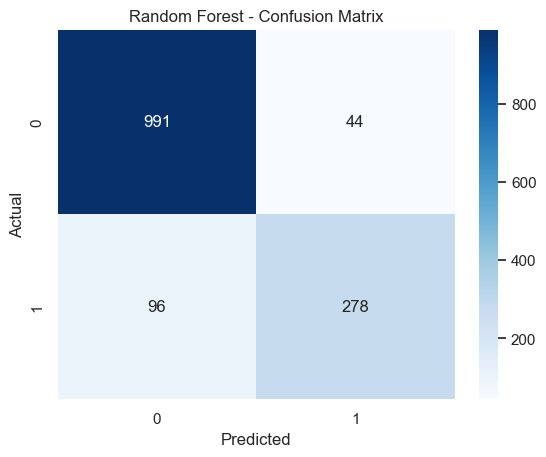

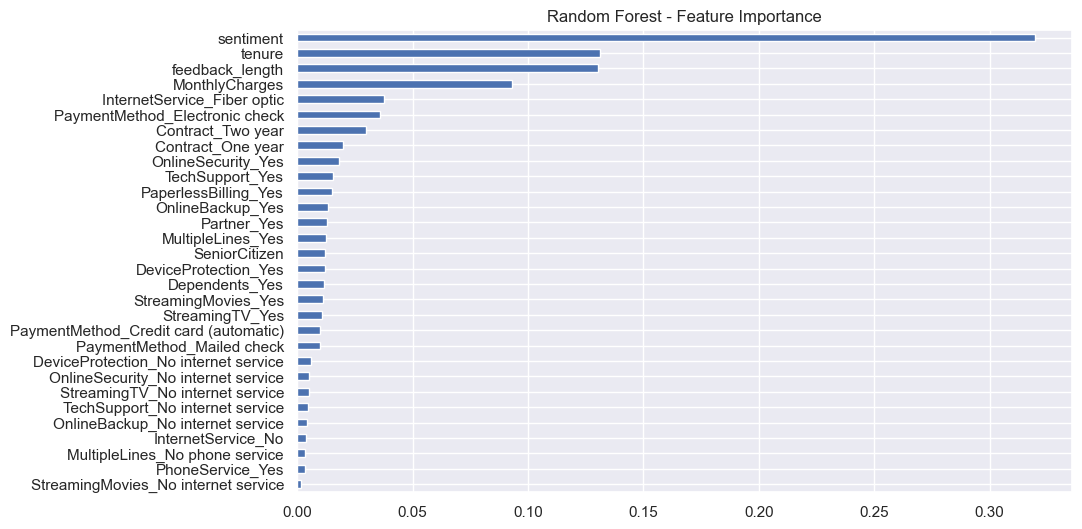


--- Gradient Boosting ---
Train Accuracy: 0.917
Test Accuracy: 0.899
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1035
           1       0.83      0.77      0.80       374

    accuracy                           0.90      1409
   macro avg       0.88      0.86      0.87      1409
weighted avg       0.90      0.90      0.90      1409



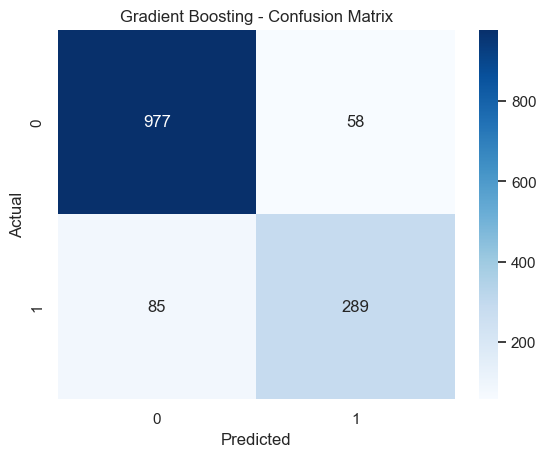

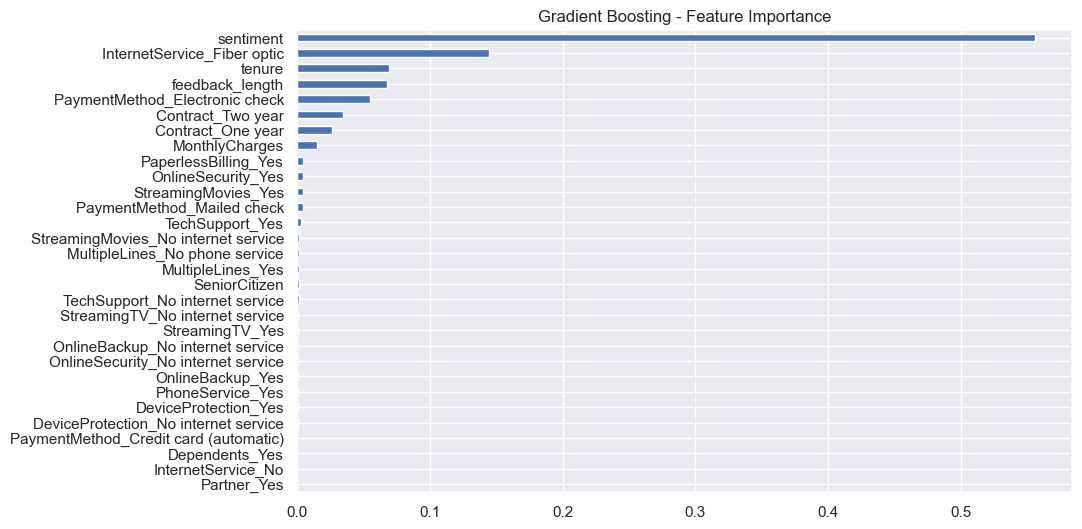


Test Accuracy Summary:
Logistic Regression: 0.900
Random Forest: 0.901
Gradient Boosting: 0.899


In [41]:
# ---- Importi ----
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Dataset ----
input_without_feedback = train_scaled.drop(["ChurnBinary", "CustomerFeedback"], axis=1)
output_without_feedback = train_scaled["ChurnBinary"]

input_train, input_test, output_train, output_test = train_test_split(
    input_without_feedback, output_without_feedback, test_size=0.2, random_state=42, stratify=output_without_feedback
)

# ---- Lista modela ----
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
}

# ---- Treniranje i evaluacija ----
results = {}

for name, model in models.items():
    # Treniranje
    model.fit(input_train, output_train)
    # Predikcija
    pred_train = model.predict(input_train)
    pred_test = model.predict(input_test)
    # Evaluacija
    acc_train = accuracy_score(output_train, pred_train)
    acc_test = accuracy_score(output_test, pred_test)
    print(f"\n--- {name} ---")
    print(f"Train Accuracy: {acc_train:.3f}")
    print(f"Test Accuracy: {acc_test:.3f}")
    print("Classification Report (Test):")
    print(classification_report(output_test, pred_test))
    
    # Confusion Matrix
    cm = confusion_matrix(output_test, pred_test)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()
    
    # Feature importance za Random Forest i Gradient Boosting
    if name in ["Random Forest", "Gradient Boosting"]:
        importances = pd.Series(model.feature_importances_, index=input_train.columns)
        importances.sort_values().plot(kind='barh', figsize=(10,6))
        plt.title(f"{name} - Feature Importance")
        plt.show()
    
    results[name] = acc_test

# ---- Rezime test tačnosti ----
print("\nTest Accuracy Summary:")
for name, acc in results.items():
    print(f"{name}: {acc:.3f}")
